# **Actividad 4**

In [ ]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Actividad 1:** Resumimos en una sola celda el proceso que realizamos en la actividad pasada para editar el dataframe inicial  y concluímos con el dataframe con el que trabajaremos.

In [ ]:
#Leemos el archivo de datos de la estación climatológica para crear un dataframe con la biblioteca Pandas
url = "https://raw.githubusercontent.com/TonyReyesM/Fisica-Computacional/master/Actividad%201/Datos%20diarios%203074.txt"
df = pd.read_csv(url)

#Los datos comienzan en el renglon 19.
#El último renglón del archivo no tiene datos
#Los nombres de las 5 columnas son "Fecha", "Precip (mm)", "Evap (mm)", "Tmax (ºC)", "Tmin (ºC)"
#Creamos una lista de los nombres de las 5 columnas
columnas = ['Fecha','Precip','Evap','Tmax','Tmin']
#Creamos el nuevo dataframe sin los primeros 15 renglones ni el último renglón
clima = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#Visualizamos el dataframe creado
#clima
#Exploramos el principio y el final del dataframe
print(clima.head(10))
print(clima.tail(10))

#Analizamos las dimensiones del dataframe y vemos los renglones y las columnas respectivamente.
clima.shape

#Creamos una copia del dataframe para trabajar con ella y no modificar el original
clima_cp0 = clima.copy()
#clima_cp0.head()

#Remplazamos con un espacio en blanco los valores donde esté escrito "Nulo"
clima_cp1 = clima_cp0.replace(to_replace = 'Nulo',value = '', regex = True)

#Convertimos a datos numéricos la información de las columnas de precipitación, evaporación, temperatura máxima, y temperatura mínina
#Utilizamos una iteración para cambiar los datos de cada columna de una por una
for i in columnas[1:]:
  clima_cp1[i] = pd.to_numeric(clima_cp1[i], errors = 'coerce')

#Visualizamos los primeros datos del dataframe para verificar que se realizaron los cambios
#clima_cp1.head()

#Revisamos la información que hay en el dataframe nuevo
#clima_cp1.info()

#Revisamos la cantidad de datos faltantes que hay en el archivo
#clima_cp1.isnull().sum()

#Revisamos el principio y final del dataframe
#print(clima_cp1.head())
#print(clima_cp1.tail())

#Hacemos un análisis estadístico con 3 cifras significativas del dataframe para después interpretarlo
#clima_cp1.describe().round(3)

#Ahora cambiaremos la información de la columna de fechas para cambiarlos a un formato de fecha y tiempo que python reconozca
#Primero generamos una copia del dataframe por si hay necesidad de utilizarlo de nuevo
clima_cp2 = clima_cp1.copy()

#Cambiamos los valores de la columna de fechas con el día al principio
clima_cp2['Fecha'] = pd.to_datetime(clima['Fecha'], dayfirst = True)
print(clima_cp2.head())

#Revisamos los tipos de variables que hay en cada columna
clima_cp2.dtypes

#Creamos dos nuevas columnas para el año y el mes
clima_cp2['Año'] = clima_cp2['Fecha'].dt.year
clima_cp2['Mes'] = clima_cp2['Fecha'].dt.month

#Revisamos el dataframe
#print(clima_cp2.head())
#print(clima_cp2.tail())

#Revisamos la información en las columnas de año y mes y que sean de valores enteros
#clima_cp2.info()

#Creamos el archivo con el que trabajaremos para la siguiente actividad
#Revisamos la información en el archivo e imprimimos los primeros y los últimos datos
dat_meteor = clima_cp2.copy()
dat_meteor.info()
print(dat_meteor.head())
print(dat_meteor.tail())

        Fecha Precip Evap  Tmax  Tmin
0  01/01/1940      0  4.2    23    16
1  02/01/1940      0  5.1    23    16
2  03/01/1940      0  4.6  24.2  16.5
3  04/01/1940      0  4.2  23.6  16.4
4  05/01/1940      0  5.7  23.2  18.2
5  06/01/1940      0  4.7  24.8    18
6  07/01/1940      0  6.2    21    16
7  08/01/1940      0  4.3    23  15.4
8  09/01/1940      0  5.3    23    15
9  10/01/1940      0  5.2  22.6  15.2
            Fecha Precip Evap  Tmax  Tmin
27165  22/12/2017      0  2.1  25.9  17.4
27166  23/12/2017      0  3.3  21.5  17.4
27167  24/12/2017      0  4.7  22.5    18
27168  25/12/2017      0  3.5  25.8  16.4
27169  26/12/2017      0  2.6  26.4  14.6
27170  27/12/2017      0  4.6  29.2    15
27171  28/12/2017      0  3.4  27.5    16
27172  29/12/2017      0    3  26.8  17.4
27173  30/12/2017      0    3    26  16.6
27174  31/12/2017      0  0.1  29.1    17
       Fecha  Precip  Evap  Tmax  Tmin
0 1940-01-01     0.0   4.2  23.0  16.0
1 1940-01-02     0.0   5.1  23.0  16.0
2 1

In [ ]:
#Eliminamos la columna "Mes" para crear una nueva que denote cada mez con su nombre en lugar de un entero utilizando la función dt.strftime(%b)
#donde %b sirve para representar los meses por sus nombres
dat_meteor.drop("Mes", axis=1, inplace=True)
dat_meteor['Mes'] = dat_meteor['Fecha'].dt.strftime('%b')
dat_meteor.info()
print(dat_meteor.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27175 entries, 0 to 27174
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   27175 non-null  datetime64[ns]
 1   Precip  26956 non-null  float64       
 2   Evap    24242 non-null  float64       
 3   Tmax    27165 non-null  float64       
 4   Tmin    27166 non-null  float64       
 5   Año     27175 non-null  int64         
 6   Mes     27175 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1940-01-01     0.0   4.2  23.0  16.0  1940  Jan
1 1940-01-02     0.0   5.1  23.0  16.0  1940  Jan
2 1940-01-03     0.0   4.6  24.2  16.5  1940  Jan
3 1940-01-04     0.0   4.2  23.6  16.4  1940  Jan
4 1940-01-05     0.0   5.7  23.2  18.2  1940  Jan


In [ ]:
 #Revisamos la información que tenemos en el dataframe con el que trabajaremos
 dat_meteor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27175 entries, 0 to 27174
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   27175 non-null  datetime64[ns]
 1   Precip  26956 non-null  float64       
 2   Evap    24242 non-null  float64       
 3   Tmax    27165 non-null  float64       
 4   Tmin    27166 non-null  float64       
 5   Año     27175 non-null  int64         
 6   Mes     27175 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB


**Actividad 2:** Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando. Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente.

 

***Precipitación***

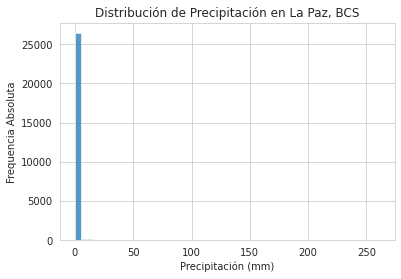

In [ ]:
#Histograma
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en La Paz, BCS')
sns.histplot(data=dat_meteor, x='Precip', bins=50, log_scale=(False,False));

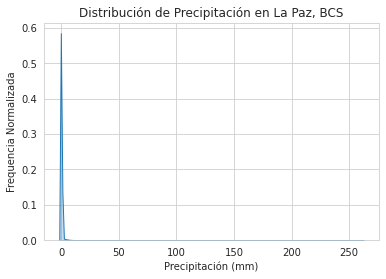

In [ ]:
#Función de densidad de probabilidad (KDE - Kernel Density Estimate)
#Utilizamos la biblioteca Seaborn
sns.set_style("whitegrid")

#Creamos la KDE
sns.kdeplot(dat_meteor.Precip, fill=True);

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de Precipitación en La Paz, BCS')

plt.show()

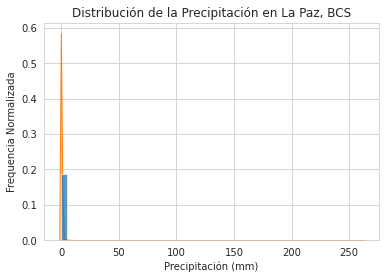

In [ ]:
#Gráfica de histograma y función de densidad de probabilidad sobrepuestas
sns.set_style("whitegrid")

sns.histplot(data=dat_meteor, x='Precip', bins=50, stat='density');
sns.kdeplot(dat_meteor.Precip, fill=True);

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en La Paz, BCS')

plt.show()


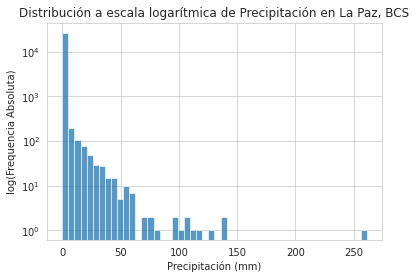

In [ ]:
#Histograma
#Utilizamos escala logarítmica en el eje 'y' para tener una mejor visualización 
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución a escala logarítmica de Precipitación en La Paz, BCS')
sns.histplot(data=dat_meteor, x='Precip', bins=50, log_scale=(False,True));

***Evaporación***

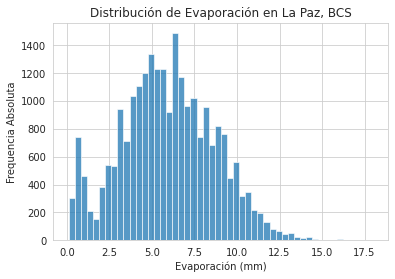

In [ ]:
#Histograma
#Utilizamos la biblioteca Seaborn 
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Evaporación en La Paz, BCS')
sns.histplot(data=dat_meteor, x='Evap', bins=50);

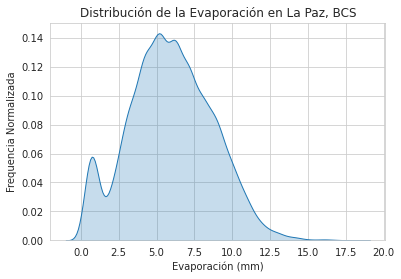

In [ ]:
#Función de densidad de probabilidad (KDE - Kernel Density Estimate)
#Utilizamos la biblioteca Seaborn
sns.set_style("whitegrid")

#Creamos la KDE
sns.kdeplot(dat_meteor.Evap, fill=True);

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en La Paz, BCS')

plt.show()

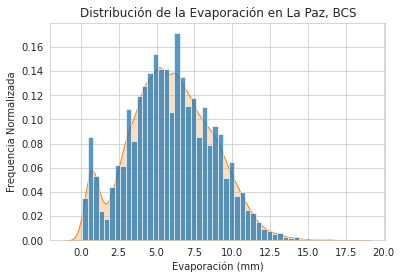

In [ ]:
#Gráfica de histograma y función de densidad de probabilidad sobrepuestas
sns.set_style("whitegrid")

sns.histplot(data=dat_meteor, x='Evap', bins=50, stat='density');
sns.kdeplot(dat_meteor.Evap, fill=True);

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en La Paz, BCS')

plt.show()


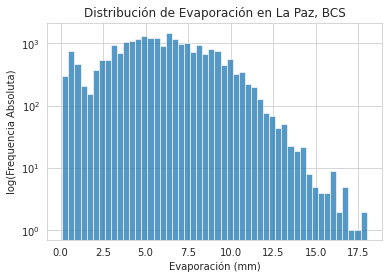

In [ ]:
#Histograma en escala logarítmica
#Utilizamos escala logarítmica en el eje 'y' para tener otra visualización 
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución a escala logarítmica de Evaporación en La Paz, BCS')
sns.histplot(data=dat_meteor, x='Evap', bins=50, log_scale=(False,True));

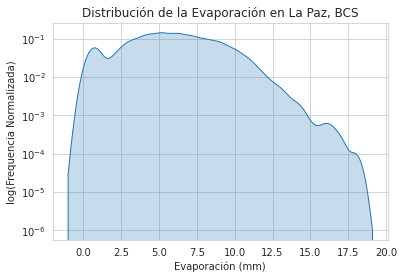

In [ ]:
#Función de densidad de probabilidad (KDE - Kernel Density Estimate) a escala logarítmica
#Utilizamos la biblioteca Seaborn
sns.set_style("whitegrid")

#Creamos la KDE con escala logarítmica
sns.kdeplot(dat_meteor.Evap, log_scale=(False,True), fill=True);

plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Normalizada)')
plt.title('Distribución de la Evaporación en La Paz, BCS')

plt.show()

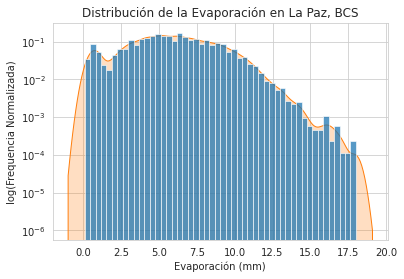

In [ ]:
#Gráfica de histograma y función de densidad de probabilidad sobrepuestas en escala logarítmica
sns.set_style("whitegrid")

sns.histplot(data=dat_meteor, x='Evap', bins=50, stat='density', log_scale=(False,True));
sns.kdeplot(dat_meteor.Evap, log_scale=(False, True), fill=True);

plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Normalizada)')
plt.title('Distribución de la Evaporación en La Paz, BCS')

plt.show()

***Temperaturas máximas***

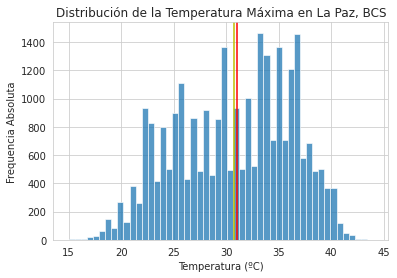

In [ ]:
#Histograma
#Utilizamos la biblioteca seaborn
sns.set_style("whitegrid")
#Rescatamos los valores del promedio y la mediana de los datos de temperatura máxima para graficarlos también
TmedMax = dat_meteor.Tmax.median() 
TpromMax = dat_meteor.Tmax.mean()

#Creamos el histograma con lo datos de la columna Tmax
sns.histplot(data=dat_meteor, x='Tmax', bins=50);
#Agregamos lineas para indicar los valores del promedio y la mediana
plt.axvline(x = TmedMax, color = 'r', label = 'm') 
plt.axvline(x = TpromMax, color = 'y', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en La Paz, BCS')

plt.show()

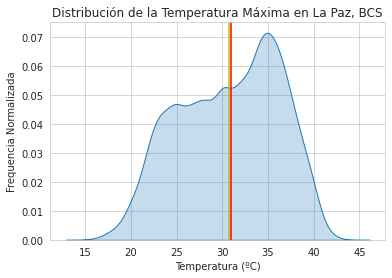

In [ ]:
#Función de densidad de probabilidad (KDE - Kernel Density Estimate)
#Utilizamos la biblioteca Seaborn
sns.set_style("whitegrid")

#Creamos la KDE de nuevo incluyendo los valores del promedio y la mediana
sns.kdeplot(dat_meteor.Tmax, fill=True);
plt.axvline(TmedMax, color = 'r'); 
plt.axvline(TpromMax, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en La Paz, BCS')

plt.show()

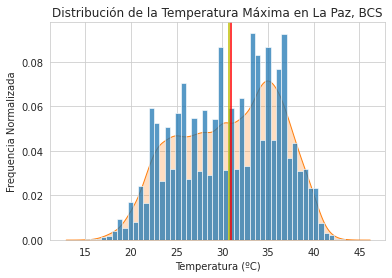

In [ ]:
#Gráfica de histograma y función de densidad de probabilidad sobrepuestas
sns.set_style("whitegrid")

sns.histplot(data=dat_meteor, x='Tmax', bins=50, stat='density');
sns.kdeplot(dat_meteor.Tmax, fill=True);

plt.axvline(TmedMax, color = 'r'); 
plt.axvline(TpromMax, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en La Paz, BCS')

plt.show()


***Temperaturas mínimas***

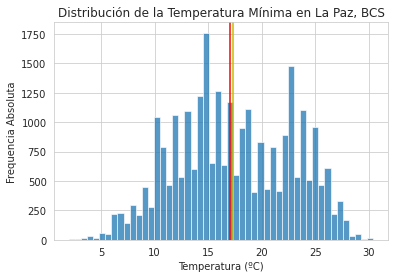

In [ ]:
#Histograma
#Utilizamos la biblioteca seaborn
sns.set_style("whitegrid")
#Rescatamos los valores del promedio y la mediana de los datos de temperatura máxima para graficarlos también
TmedMin = dat_meteor.Tmin.median() 
TpromMin = dat_meteor.Tmin.mean()

#Creamos el histograma con lo datos de la columna Tmax
sns.histplot(data=dat_meteor, x='Tmin', bins=50);
#Agregamos lineas para indicar los valores del promedio y la mediana
plt.axvline(x = TmedMin, color = 'r', label = 'm') 
plt.axvline(x = TpromMin, color = 'y', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en La Paz, BCS')

plt.show()

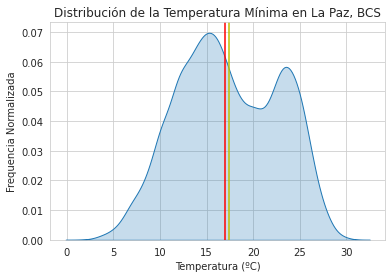

In [ ]:
#Función de densidad de probabilidad
#Función de densidad de probabilidad (KDE - Kernel Density Estimate)
#Utilizamos la biblioteca Seaborn
sns.set_style("whitegrid")

#Creamos la KDE de nuevo incluyendo los valores del promedio y la mediana
sns.kdeplot(dat_meteor.Tmin, fill=True);
plt.axvline(TmedMin, color = 'r'); 
plt.axvline(TpromMin, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en La Paz, BCS')

plt.show()

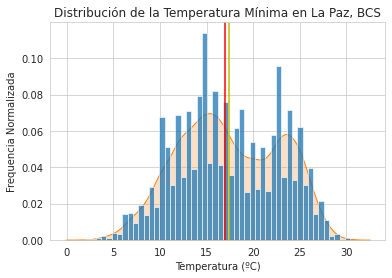

In [ ]:
#Gráfica de histograma y función de densidad de probabilidad sobrepuestas
sns.set_style("whitegrid")

sns.histplot(data=dat_meteor, x='Tmin', bins=50, stat='density');
sns.kdeplot(dat_meteor.Tmin, fill=True);

plt.axvline(TmedMin, color = 'r'); 
plt.axvline(TpromMin, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en La Paz, BCS')

plt.show()


**Actividad 3:** Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima

***Evaporación***

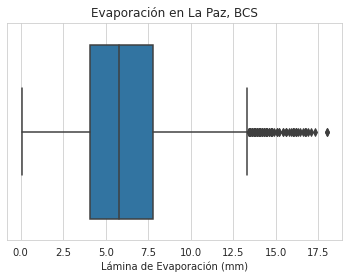

In [ ]:
#Boxplot de evaporación con biblioteca Seaborn
sns.set_style("whitegrid")
sns.boxplot(x=dat_meteor.Evap, data=dat_meteor, orient='h').set(xlabel='Lámina de Evaporación (mm)', title='Evaporación en La Paz, BCS');

***Temperaturas máximas***

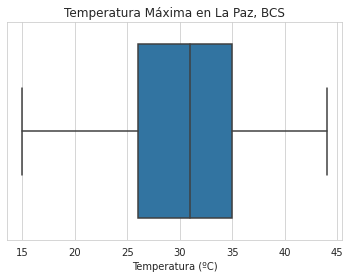

In [ ]:
#Boxplot de temperaturas máximas con biblioteca Seaborn
sns.set_style("whitegrid")
sns.boxplot(x=dat_meteor.Tmax, data=dat_meteor, orient='h').set(xlabel='Temperatura (ºC)', title='Temperatura Máxima en La Paz, BCS');

***Temperaturas mínimas***

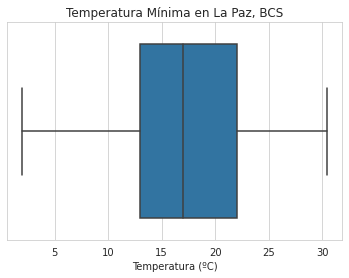

In [ ]:
#Boxplot de temperaturas mínimas con biblioteca Seaborn
sns.set_style("whitegrid")
sns.boxplot(x=dat_meteor.Tmin, data=dat_meteor, orient='h').set(xlabel='Temperatura (ºC)', title='Temperatura Mínima en La Paz, BCS');

**Actividad 4:** Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses

In [ ]:
#Seleccionaremos un conjunto de años de 30 años  
#El archivo tiene datos desde 1940 hasta el 2017, así que tomaremos desde 1988 hasta el 2017 para tener los últimos 30 años 
dat_met30 = dat_meteor[(dat_meteor['Año'] >= 1988) & (dat_meteor['Año'] <= 2017)]

***Agrupación por año***

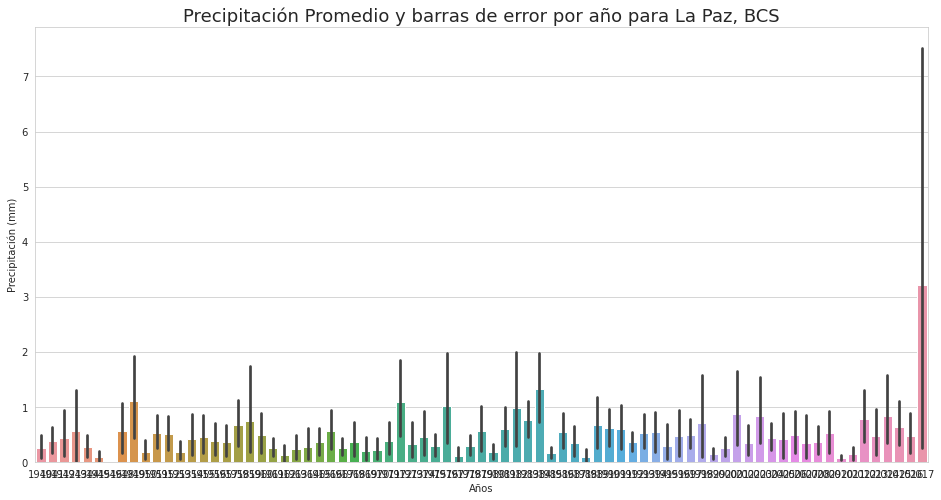

In [ ]:
#Precipitación por año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=dat_meteor);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por año para La Paz, BCS', fontsize=18)

plt.show()

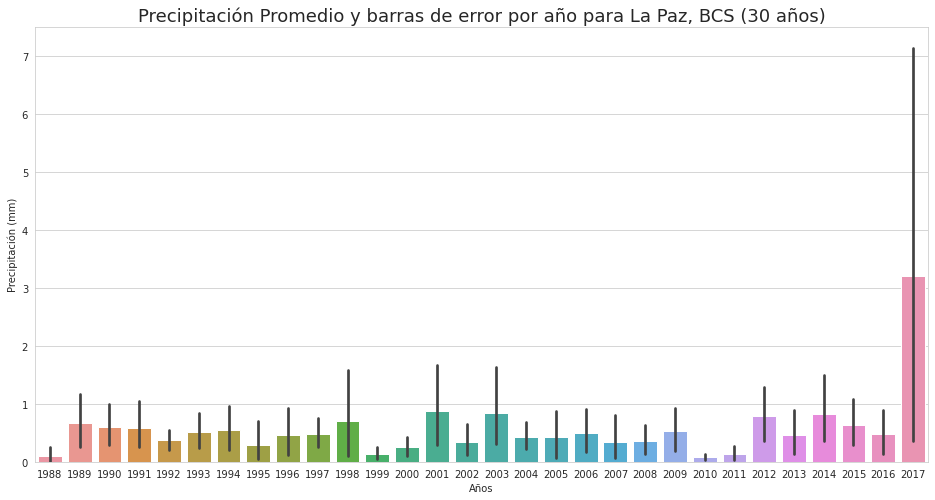

In [ ]:
#Precipitación últimos 30 años por año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=dat_met30);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por año para La Paz, BCS (30 años)', fontsize=18)

plt.show()

***Agrupación por mes***

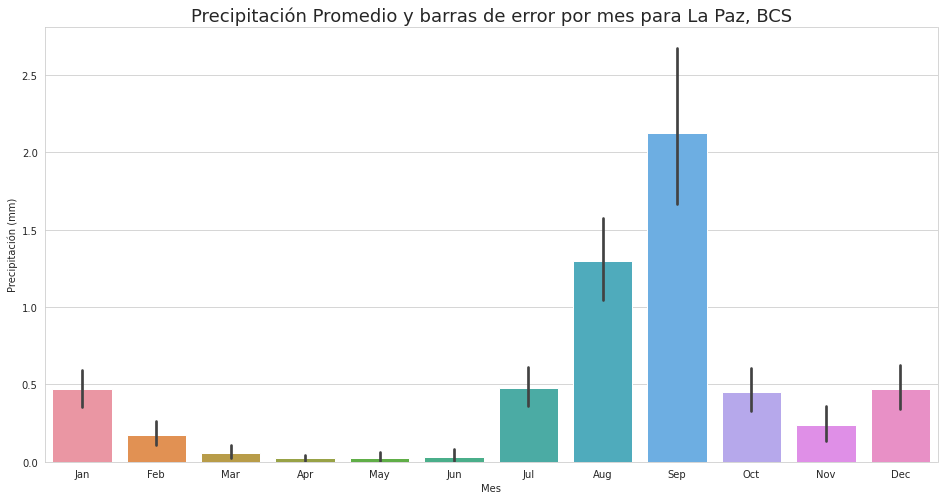

In [ ]:
#Precipitación por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=dat_meteor);

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por mes para La Paz, BCS', fontsize=18)

plt.show()

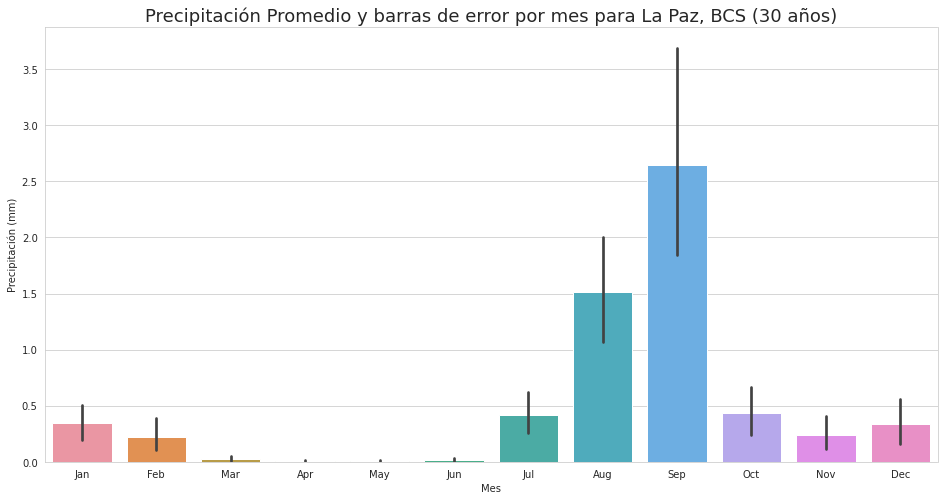

In [ ]:
#Precipitación últimos 30 años por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=dat_met30);

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por mes para La Paz, BCS (30 años)', fontsize=18)

plt.show()

**Actividad 5:** Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años).

***Precipitación***

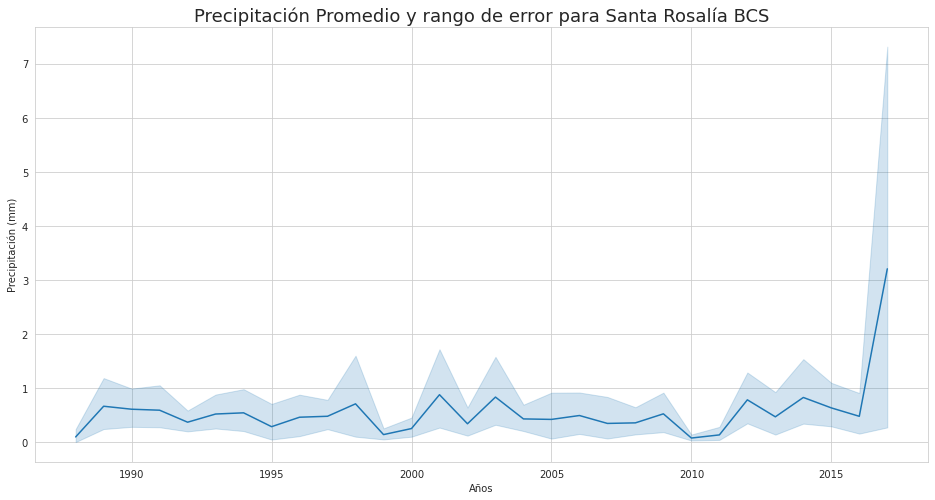

In [ ]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=dat_met30);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Santa Rosalía BCS', fontsize=18)

plt.show()

***Temperaturas máximas y mínimas***

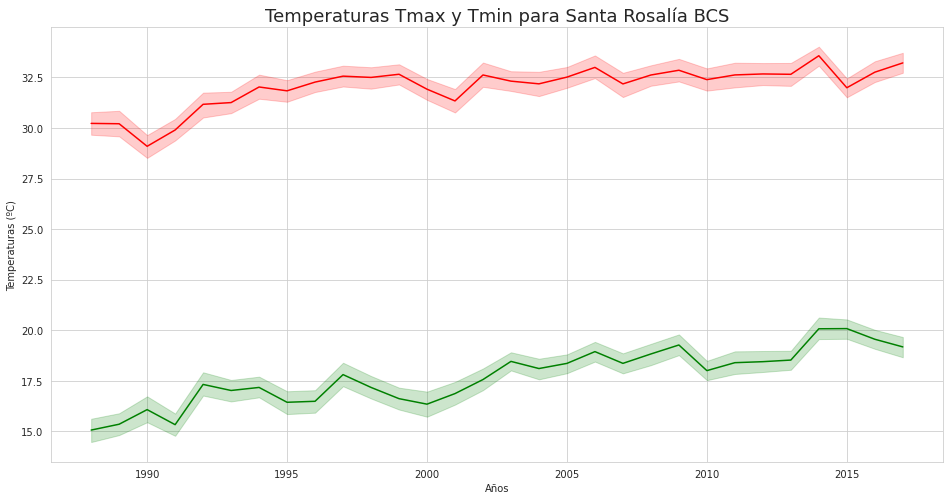

In [ ]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=dat_met30, color='r');
sns.lineplot(x='Año', y='Tmin', data=dat_met30, color='g');

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Santa Rosalía BCS', fontsize=18)

plt.show()

**Actividad 6:**  Con el conjunto de 30 años de datos, produzca diagramas de cajas para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

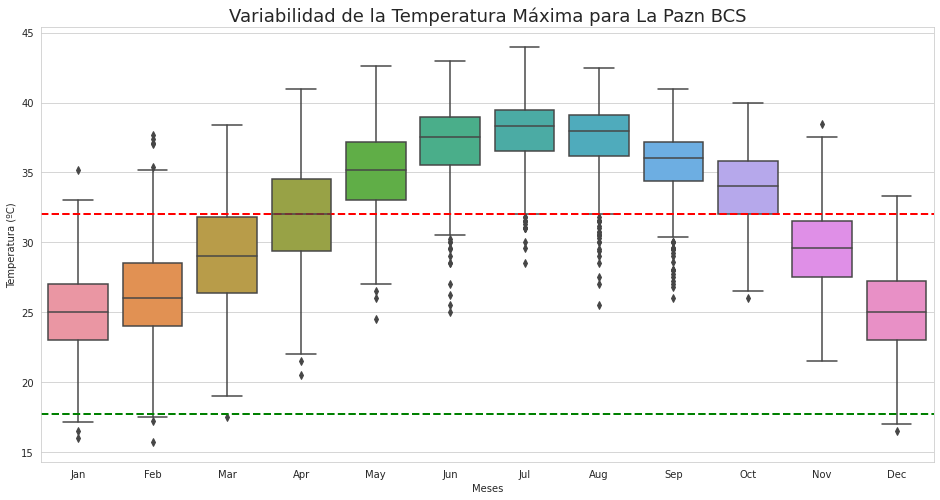

Promedio de temperatura máxima:  32.036373596275524 ºC
Promedio de temperatura mínima:  17.703414589609945 ºC
Diferencia entre el promedio de temperatura máxima y temperatura mínima:  14.332959006665579 ºC


In [ ]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_p30 = dat_met30.Tmax.mean()
Tmin_p30 = dat_met30.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=dat_met30);
# Linea de Tmax promedio 
plt.axhline(Tmax_p30, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_p30, color = 'g', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para La Pazn BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('Promedio de temperatura máxima: ', Tmax_p30, 'ºC')
print('Promedio de temperatura mínima: ', Tmin_p30, 'ºC')
print('Diferencia entre el promedio de temperatura máxima y temperatura mínima: ', (Tmax_p30 - Tmin_p30), 'ºC')

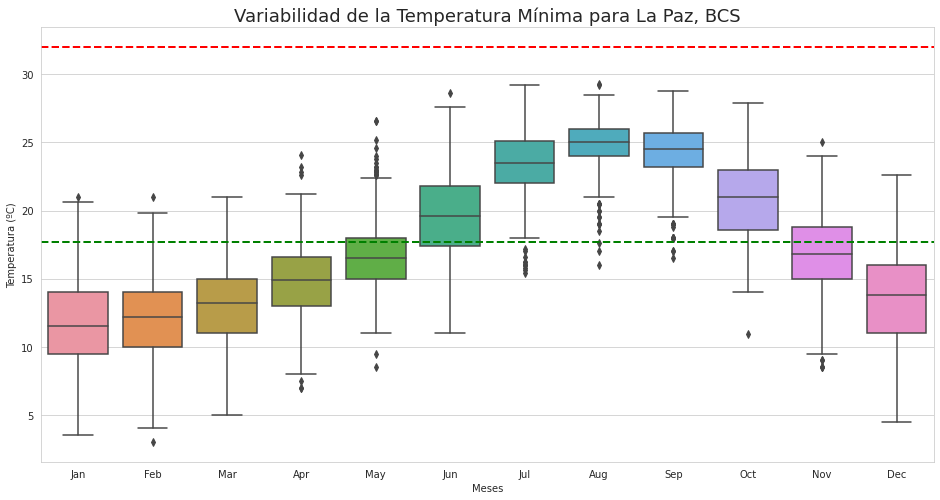

Promedio de temperatura máxima:  32.036373596275524 ºC
Promedio de temperatura mínima:  17.703414589609945 ºC
Diferencia entre el promedio de temperatura máxima y temperatura mínima:  14.332959006665579 ºC


In [ ]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=dat_met30);
# Linea de Tmin promedio 
plt.axhline(Tmax_p30, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_p30, color = 'g', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para La Paz, BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('Promedio de temperatura máxima: ', Tmax_p30, 'ºC')
print('Promedio de temperatura mínima: ', Tmin_p30, 'ºC')
print('Diferencia entre el promedio de temperatura máxima y temperatura mínima: ', (Tmax_p30 - Tmin_p30), 'ºC')

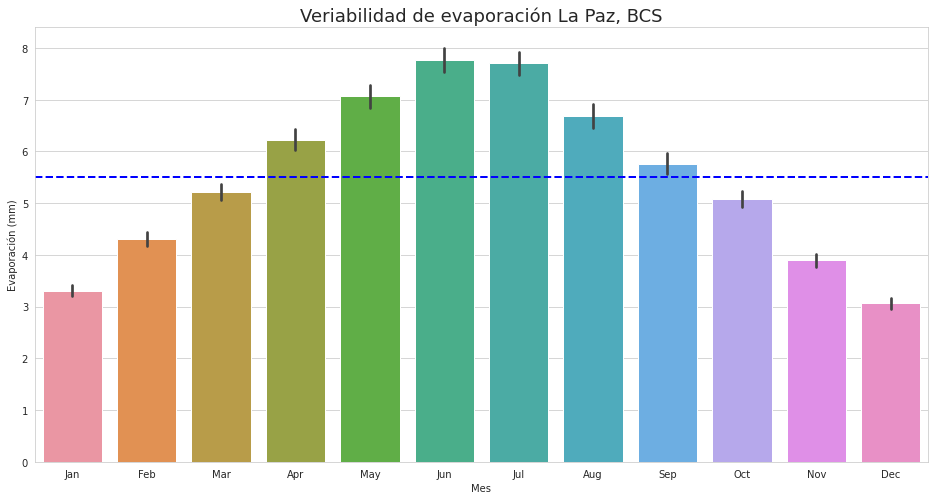

In [ ]:
#Evaporación últimos 30 años por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Calculamos el promedio de la evaporación
Evap_p30 = dat_met30.Evap.mean()

#Gráfica de cajas de evaporación
g=sns.barplot(x='Mes', y='Evap', data=dat_met30);
#Linea de evaporación promedio 
plt.axhline(Evap_p30, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Mes')
plt.ylabel('Evaporación (mm)')
plt.title('Veriabilidad de evaporación La Paz, BCS', fontsize=18)

plt.show()